<a href="https://colab.research.google.com/github/VinLavor/Analise_Financeira_em_Python/blob/main/An%C3%A1lise_Financeira_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importações


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas_datareader.data as web
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import seaborn as sns

yf.pdr_override()

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
!pip install pyfolio
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.5 MB/s eta 0:00:00
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88650 sha256=23cb6ff8b010aee9be1d8ed481028114cee7f9ff18d2e7814cb947f760d99732
  Stored in directory: /root/.cache/pip/wheels/71/38/bc/e53700cfd8b0ad6b539d2fbaaf060ed8a299e7622a5b86ef42
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39754 sha256=6bea703939d5405e6f8771e18cdd5a504a64e7c396a1945a40db33bd9da6130d
  Stored in directory: /root/.cache/pip/wheels/0e/2e/f2/d6d2d9a1eb8fbbd9949bb5d4c00f753e3b74e5bd7ed10b1d36
Successfully built pyfolio empyrical


/usr/local/lib/python3.10/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


[*********************100%%**********************]  1 of 1 completed


<Axes: >

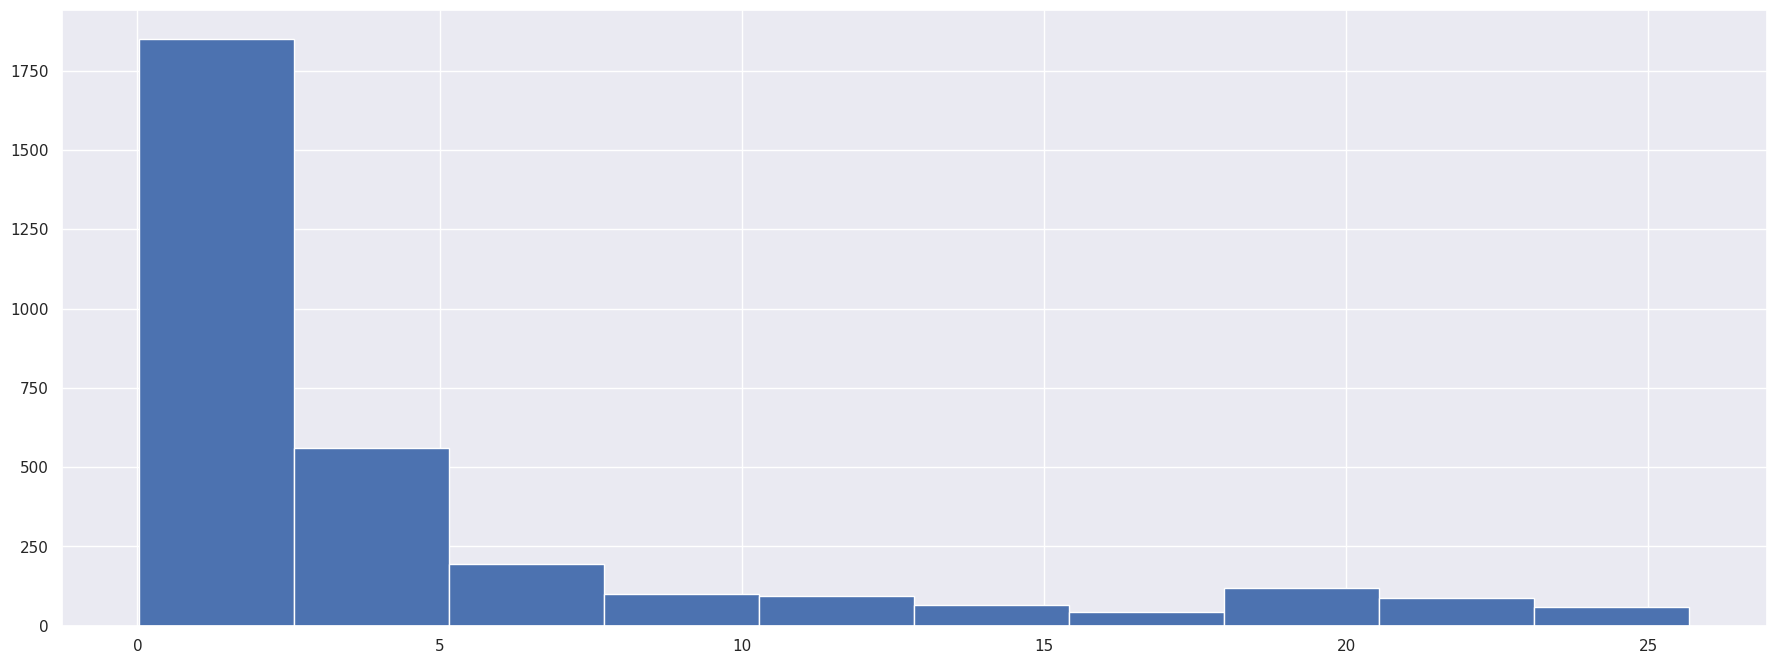

In [ ]:
%matplotlib inline
magalu = web.get_data_yahoo('MGLU3.SA') # pega os dados das ações da magalu ao longo do tempo
magalu.head() # mostra os primeiros dados ( mais antigos)

magalu.tail() # mostra os dados mais recentes

magalu['Close'].hist(figsize = (22,8))



# Obtendo dados e plotando um gráfico



[*********************100%%**********************]  1 of 1 completed


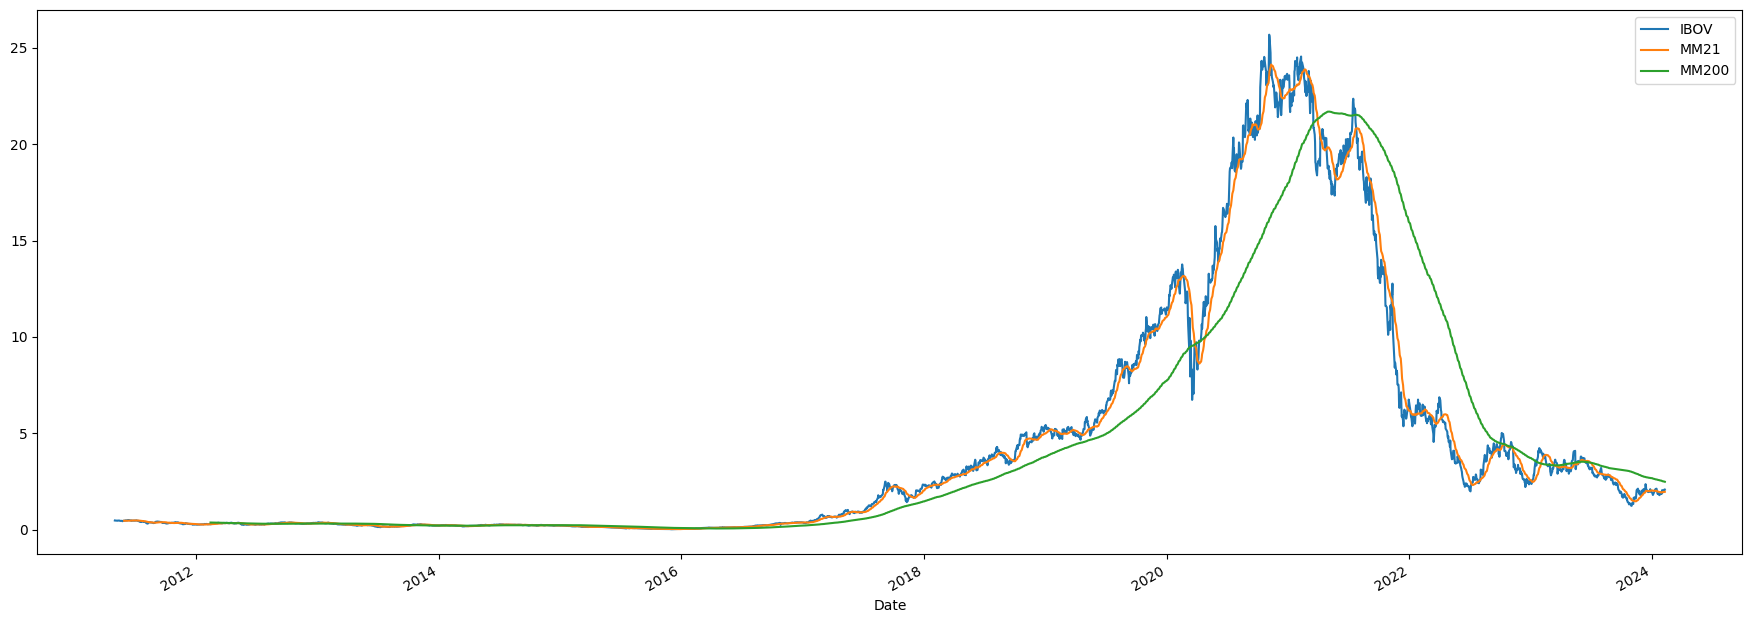

In [ ]:
magalu = web.get_data_yahoo('MGLU3.SA')
magalu.head() # mostra os primeiros dados

magalu.tail() # mostra os dados mais recentes
"""
Média Móvel:
- Normalmente utilizamos médias em dois períodos diferentes (Um mais curto e outro mais longo). Utilizada
  verificar a movimentação de uma ação nesse período
"""
magalu['Close'].plot(figsize = (22,8), label='MGLU') # plota um grafico dos fechamentos da bolsa 22 por 8
magalu['Close'].rolling(21).mean().plot(label='MM21') # rolling : janela movel de 21 dias/ mean: média dessa janela movel
magalu['Close'].rolling(200).mean().plot(label='MM200')# média móvel de um periodo maior
plt.legend() # adiciona legenda ao gráfico




# Cortando um intervalo

[*********************100%%**********************]  1 of 1 completed


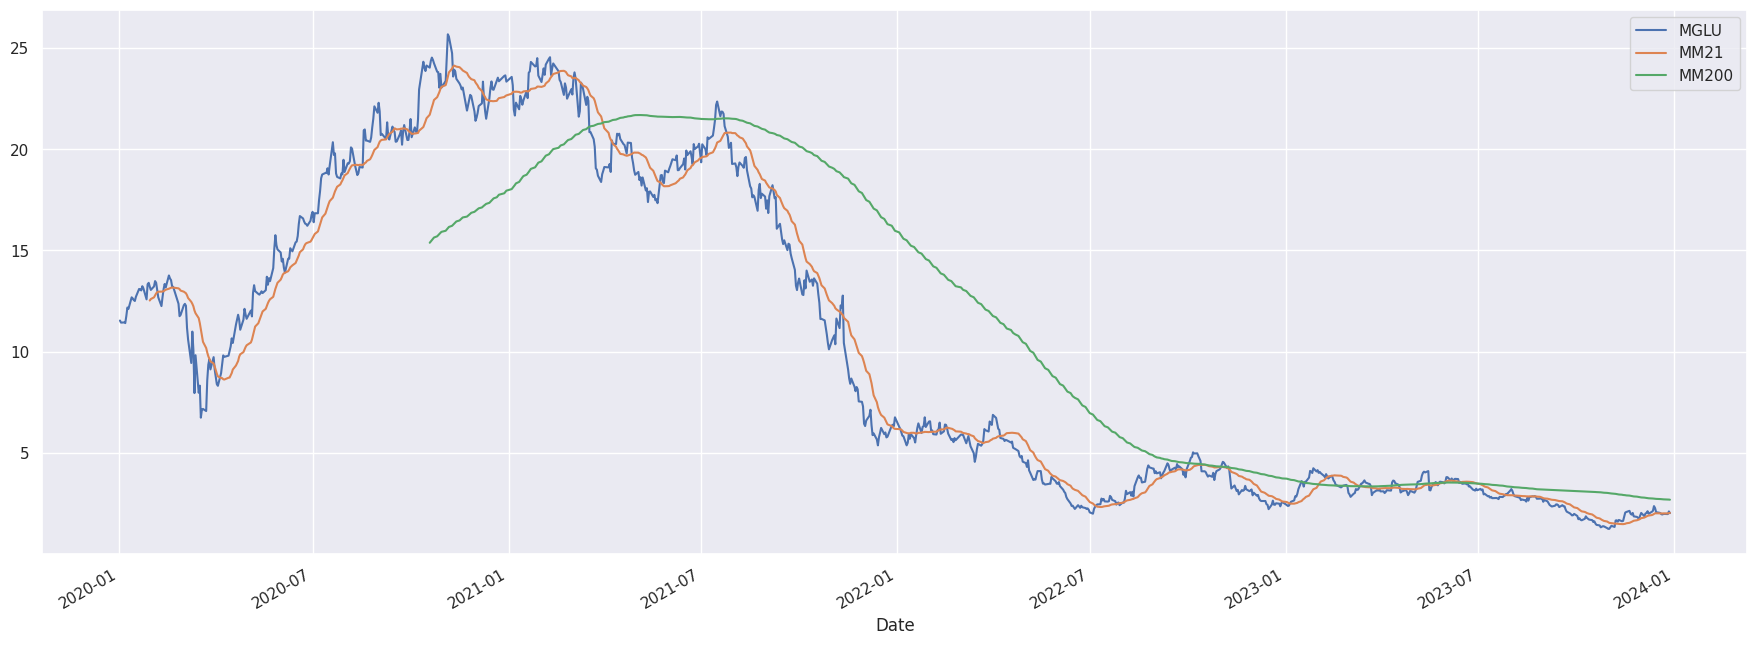

In [ ]:
magalu = web.get_data_yahoo('MGLU3.SA') # pega dados da magalu
magalu.head() # mostra os primeiros dados

magalu.tail() # mostra os dados mais recentes

# magalu_fatiado = magalu[magalu.index.year == 2020] /define um intervalo pros dados, pegando toda a base e selecionando apenas o ano de 2023
magalu_fatiado = magalu[(magalu.index.year >= 2020) & (magalu.index.year <= 2023)] # corta os dados em um intervalo entre janeiro de 2020 e dezembro de 2023
"""
Média Móvel:
- Normalmente utilizamos médias em dois períodos diferentes (Um mais curto e outro mais longo). Utilizada
  verificar a movimentação de uma ação nesse período
"""
sns.set() # adiciona um fundo em grande atrás do gráfico
magalu_fatiado['Close'].plot(figsize = (22,8), label='MGLU') # plota um grafico dos fechamentos da bolsa 22 por 8
magalu_fatiado['Close'].rolling(21).mean().plot(label='MM21') # rolling : janela movel de 21 dias/ mean: média dessa janela movel
magalu_fatiado['Close'].rolling(200).mean().plot(label='MM200')# média móvel de um periodo maior
plt.legend() # adiciona legenda ao gráfico



# Pegando meses ou dias específicos

In [ ]:
"""
- Na própria coleta de dados podemos ja definir uma base de dados por intervalo
magalu = web.get_data_yahoo('MGLU3.SA', start = '2020-05-10', end = '2021-05-10')
"""
magalu_fatiado = magalu[magalu.index.month == 12 ] # ou index.day para um dia especifico
magalu_fatiado.tail(50)
# isso mostra os 50 primeiros dados dos meses de dezembro da base de dados




,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-16,5.873830,6.088954,5.733532,5.986069,5.986069,160247792
2021-12-17,5.789651,6.294726,5.668059,6.229253,6.229253,156709764
2021-12-20,6.004775,6.285372,5.836417,5.920596,5.920596,99240547
2021-12-21,6.004775,6.182487,5.817711,6.004775,6.004775,119820061
2021-12-22,6.004775,6.182487,5.742885,5.761591,5.761591,91228237
2021-12-23,5.817711,5.929949,5.602586,5.799004,5.799004,103820888
2021-12-27,5.827064,6.341492,5.827064,6.341492,6.341492,132873622
2021-12-28,6.350845,6.509850,6.210546,6.388258,6.388258,177023167
2021-12-29,6.397611,6.453731,6.266666,6.322785,6.322785,84727277


# Fazendo correlação de ações

[*********************100%%**********************]  2 of 2 completed


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

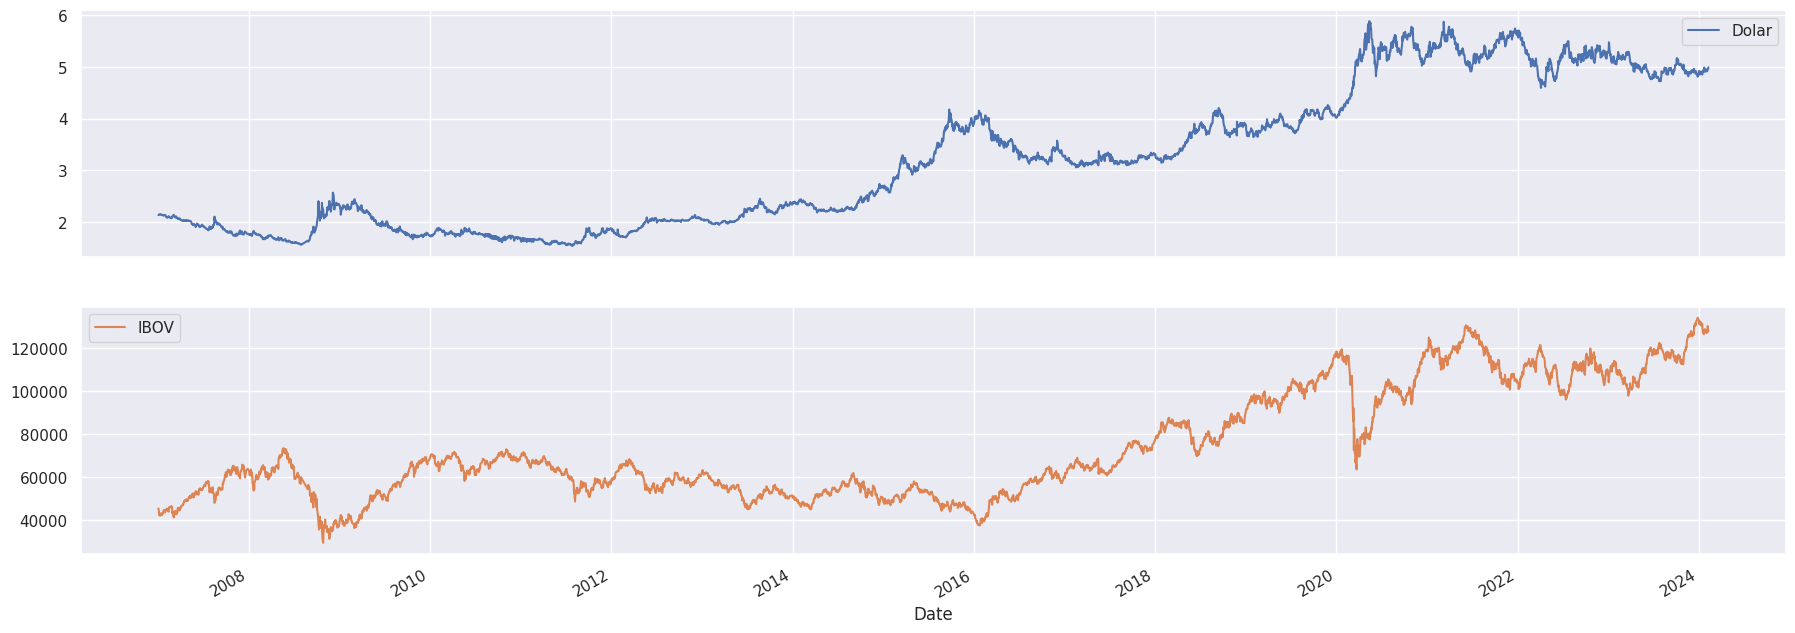

In [ ]:
tickers = ["^BVSP" , "USDBRL=X"]
carteira = web.get_data_yahoo(tickers, start = "2007-01-01")['Close'] # ao invés de passar apenas um ativo, estamos passando uma lista deles, pegando os dados de fechamento de todos os da lista
carteira = carteira.dropna() # retira os dados vazios da tabela

carteira.columns = ["Dolar", "IBOV"] # muda o nome dos gráficos
sns.set()
carteira.plot(subplots = True, figsize = (22,8) ) # divide em dois gráficos distintos




<Axes: >

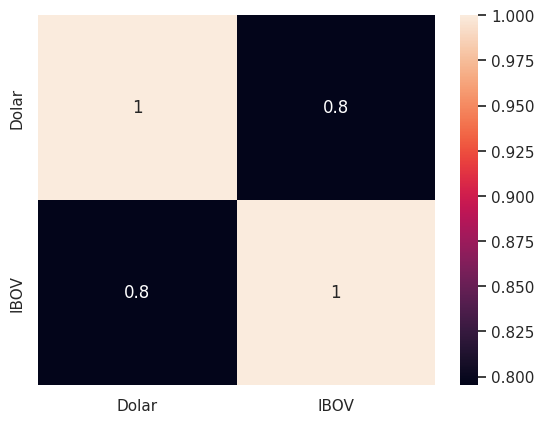

In [ ]:
sns.heatmap(carteira.corr(),annot = True) # cria um mapa de calor com os dados de correlação entre o dolar e a bovespa na base inteira
# annot = True : coloca os numeros dentro do mapa

<Axes: xlabel='Date'>

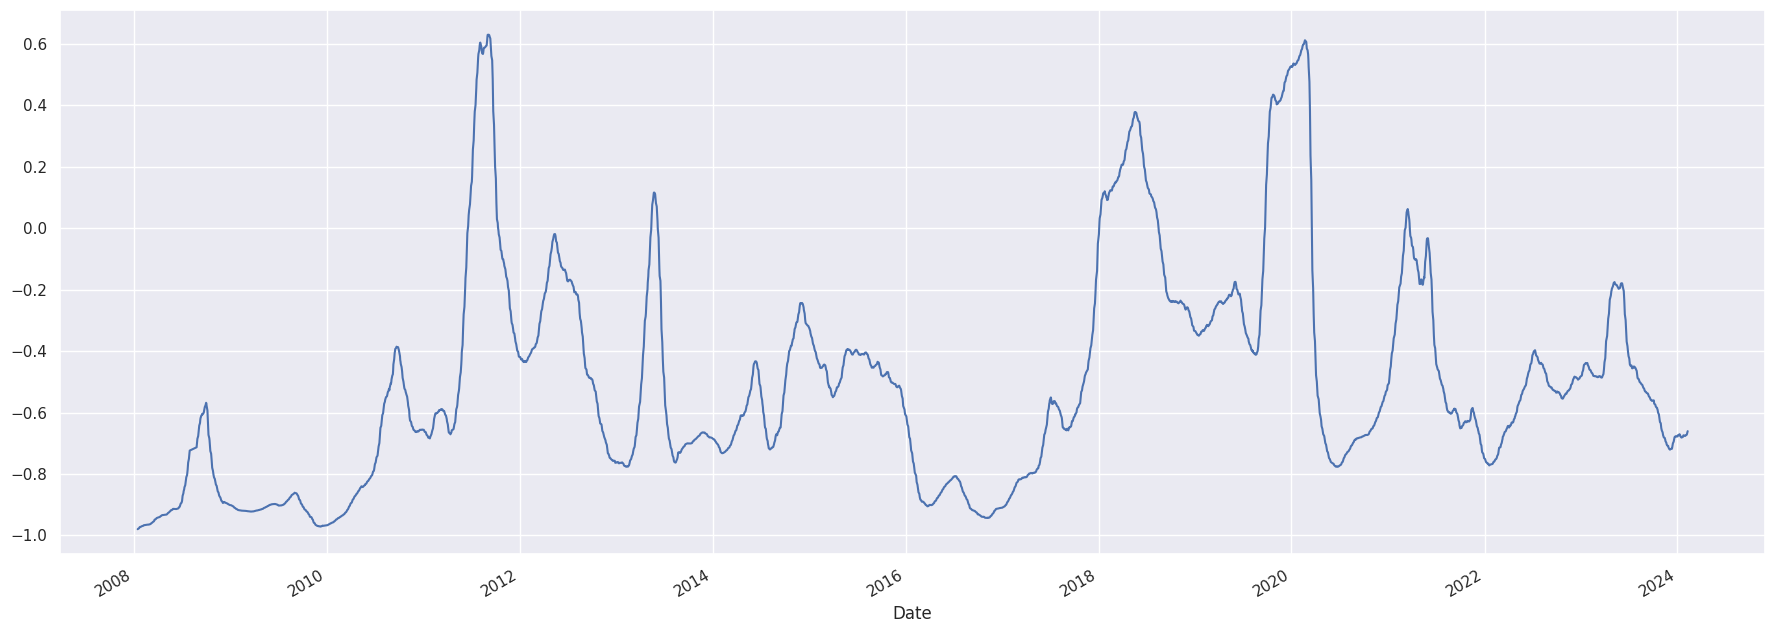

In [ ]:
"""
Correlação:
- É uma medida estatistíca que informa como duas variáveis se comportam em relação uma a outra ao longo do tempo
-Um coeficiente de correlação negativo indica que duas series temporais estão negativamente correlacionadas entre si durante um período considerado. Se uma variável sobe, a outra desce e vice-versa.
-Um coeficiente de correlação positivo indica que as variáveis temporais estão correlacionadas positivamente entre si. Movem-se em uníssono. Se uma sobe, a outra também.
-Um coeficiente de correlação 0 indica que as duas variáveis temporais estudadas não têm nenhuma relação entre si num período determinado.
"""
carteira["Dolar"].rolling(252).corr(carteira["IBOV"]).plot(figsize = (22,8)) # estamos pegando os dados do dolar em uma janela de 252 dias e correlacionando com a Ibovespa

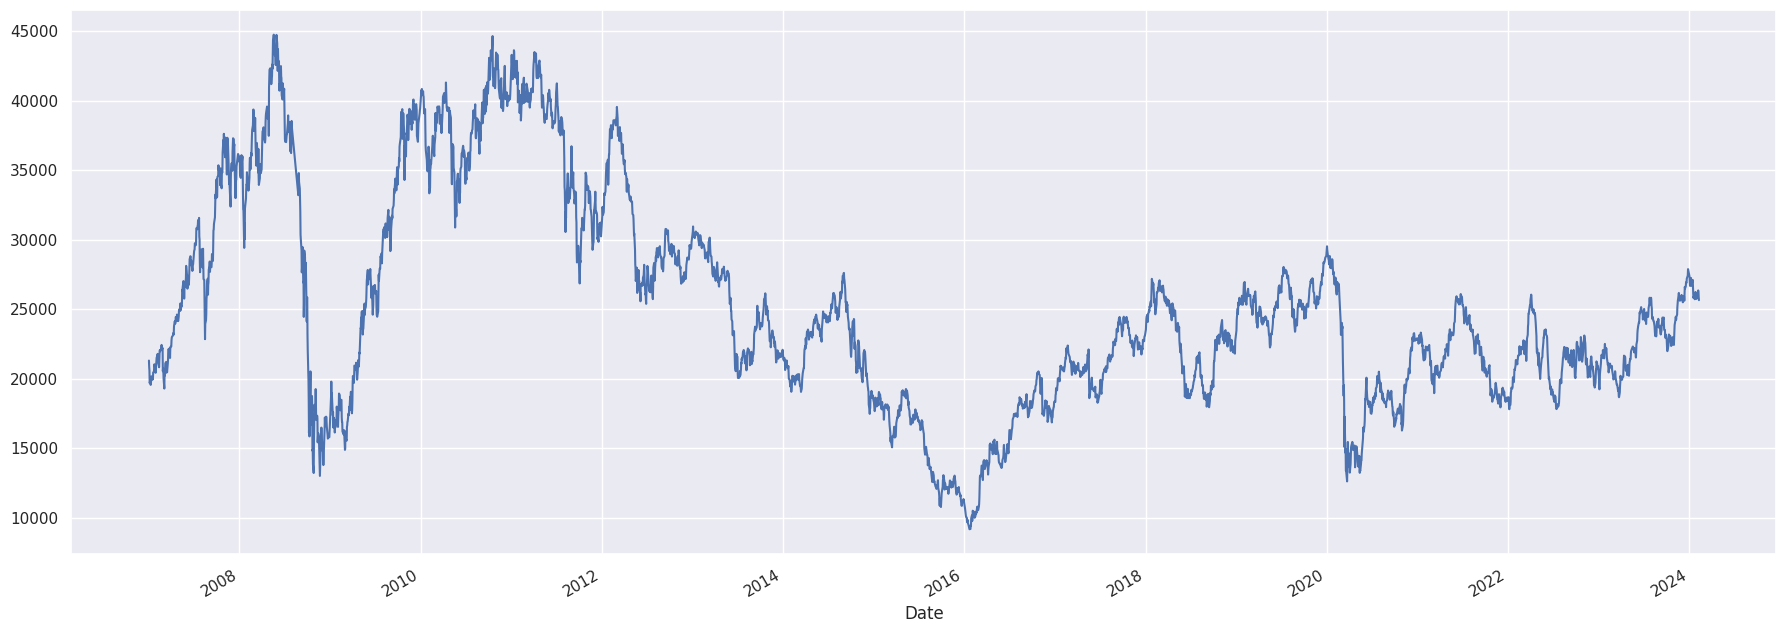

In [ ]:
carteira["IBOV-DOLARIZADO"] = (carteira['IBOV'] / carteira['Dolar']).plot(figsize = (22,8))
carteira

# Exemplo: Carteira de 4 ativos


[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

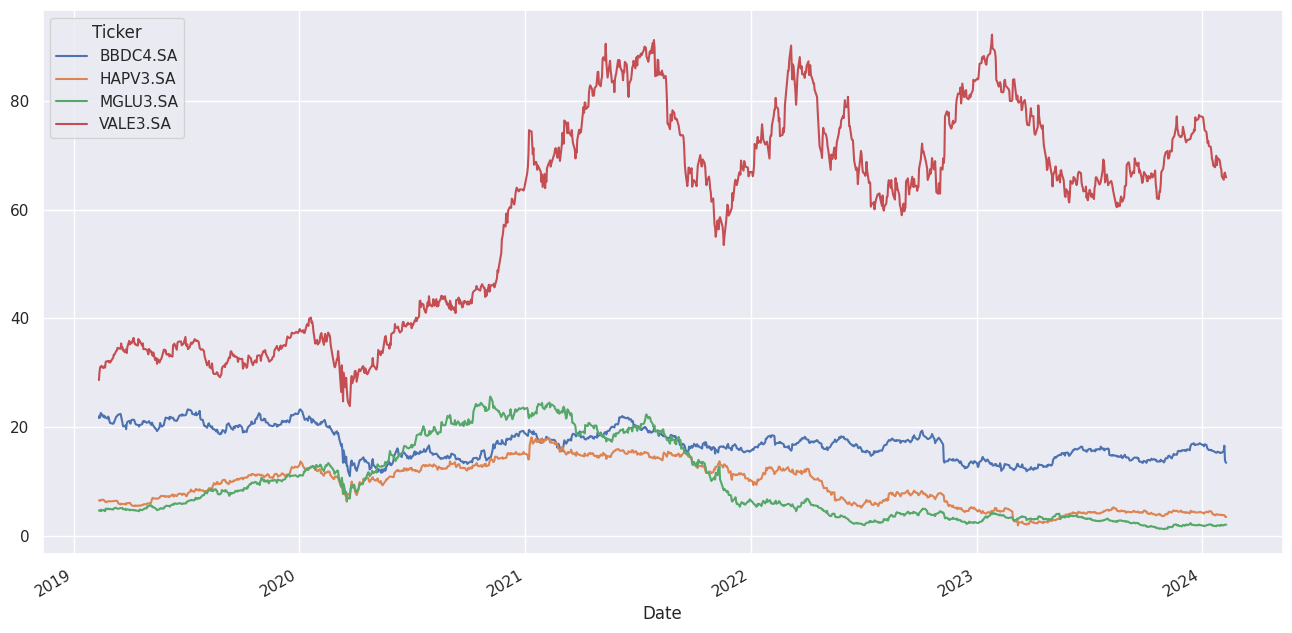

In [ ]:
ativos = ["MGLU3.SA" , "HAPV3.SA", "VALE3.SA", "BBDC4.SA"]
carteira = web.get_data_yahoo(ativos, period = "5y")["Adj Close"] # vai pegar o dado desses ativos nos ultimos 5 anos

ibov =  web.get_data_yahoo("^BVSP", period = "5y")["Adj Close"] # vai pegar os dados da ibov

sns.set()

carteira.plot(figsize = (16,8))

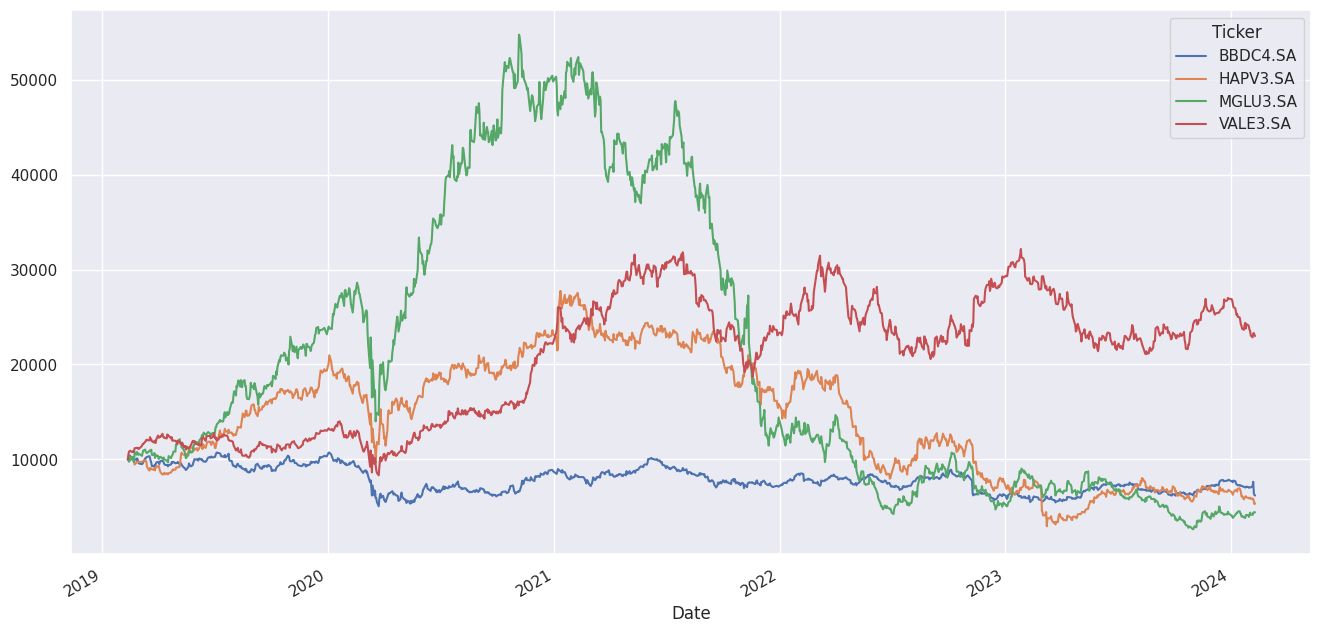

In [ ]:
carteira_normalizada = (carteira/carteira.iloc[0])* 10000 # dividindo todos os dados pela primeira cotação de cada ação (como se tivesse comprado 100 de cada uma dessas ações)

carteira_normalizada.plot(figsize = (16,8))

carteira_normalizada['Saldo'] = carteira_normalizada.sum(axis=1) # somando os valores totais dos ativos

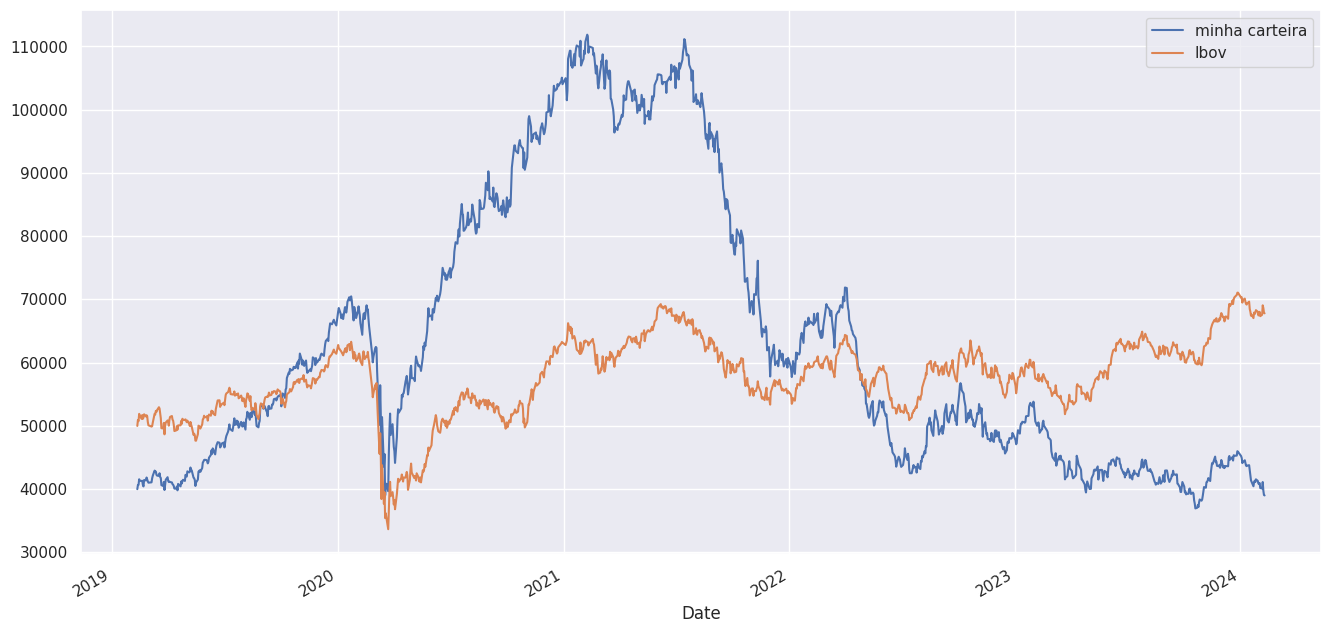

In [ ]:
ibov_normalizado = (ibov/ibov.iloc[0]) * 50000
carteira_normalizada['Saldo'].plot(figsize = (16,8) , label = 'minha carteira')
ibov_normalizado.plot(label = 'Ibov')
plt.legend()

# Usando Pyfolio para analisar a carteira


In [ ]:
!pip install git+https://github.com/quantopian/pyfolio
import pyfolio as pf # importando a biblioteca pyfolio
import warnings
warnings.filterwarnings('ignore')

  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-sw491ig8
  Running command git clone --filter=blob:none --quiet https://github.com/quantopian/pyfolio /tmp/pip-req-build-sw491ig8
  Resolved https://github.com/quantopian/pyfolio to commit 4b901f6d73aa02ceb6d04b7d83502e5c6f2e81aa
  Preparing metadata (setup.py) ... done


/usr/local/lib/python3.10/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [ ]:
ativos = ["MGLU3.SA" , "HAPV3.SA", "VALE3.SA", "BBDC4.SA","^BVSP"] # vamos utilizar a mesma carteira que usamos anteriormente
carteira = web.get_data_yahoo(ativos, period = "5y")["Adj Close"] # vai pegar o dado desses ativos nos ultimos 5 anos
sns.set()

[*********************100%%**********************]  5 of 5 completed


In [ ]:
retorno = carteira.pct_change() # calcula a porcentagem de variação do preço de cada ação (pandas)
retorno_acumulado = (1 + retorno).cumprod() # calcula o retorno acumulado usando produtório
retorno_acumulado.iloc[0] = 1 # seta todos os retornos das ações para começar em 1
carteira_acumulada = 10000 * retorno_acumulado.iloc[:, :5]
carteira_acumulada["saldo"] = carteira.sum(axis=1) # cria uma nova coluna chamada saldo que mostra a soma de todos os ativos
carteira_acumulada["retorno"] = carteira_acumulada['saldo'].pct_change()
carteira_acumulada



Ticker,BBDC4.SA,HAPV3.SA,MGLU3.SA,VALE3.SA,^BVSP,saldo,retorno
Date,,,,,,,
2019-02-19,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,97723.542572,NaN
2019-02-20,9834.548065,9880.239142,9577.979134,10068.146103,9885.929612,96609.106236,-0.011404
2019-02-21,9920.583726,9730.540069,9495.461059,9975.818629,9925.557296,96995.872363,0.004003
2019-02-22,9838.954673,9434.131964,10485.676958,10329.741943,10023.244145,97951.071219,0.009848
2019-02-25,9739.685406,9691.617190,10238.122735,10358.319480,9957.095608,97304.990070,-0.006596
...,...,...,...,...,...,...,...
2024-02-09,6078.394124,5348.655749,4327.883985,21243.871522,13109.493237,128110.969998,-0.001491
2024-02-14,6037.751004,5211.510860,4203.041293,21179.419010,13006.276943,127102.530001,-0.007872
2024-02-15,6064.846561,5257.225823,4286.269754,21111.743135,13086.761077,127888.450002,0.006183


Start date,2019-02-19
End date,2024-02-19
Total months,59
,Backtest
Annual return,5.821%
Cumulative returns,32.13%
Annual volatility,26.299%
Sharpe ratio,0.35
Calmar ratio,0.12
Stability,0.26
Max drawdown,-46.813%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,46.81,2020-01-23,2020-03-23,2021-01-06,250
1,26.52,2021-06-07,2022-07-14,2023-12-14,659
2,12.02,2021-01-08,2021-02-26,2021-05-28,101
3,10.00,2019-03-18,2019-05-17,2019-06-19,68
4,8.87,2019-07-10,2019-08-26,2019-10-21,74


Stress Events,mean,min,max
New Normal,0.04%,-14.78%,13.91%


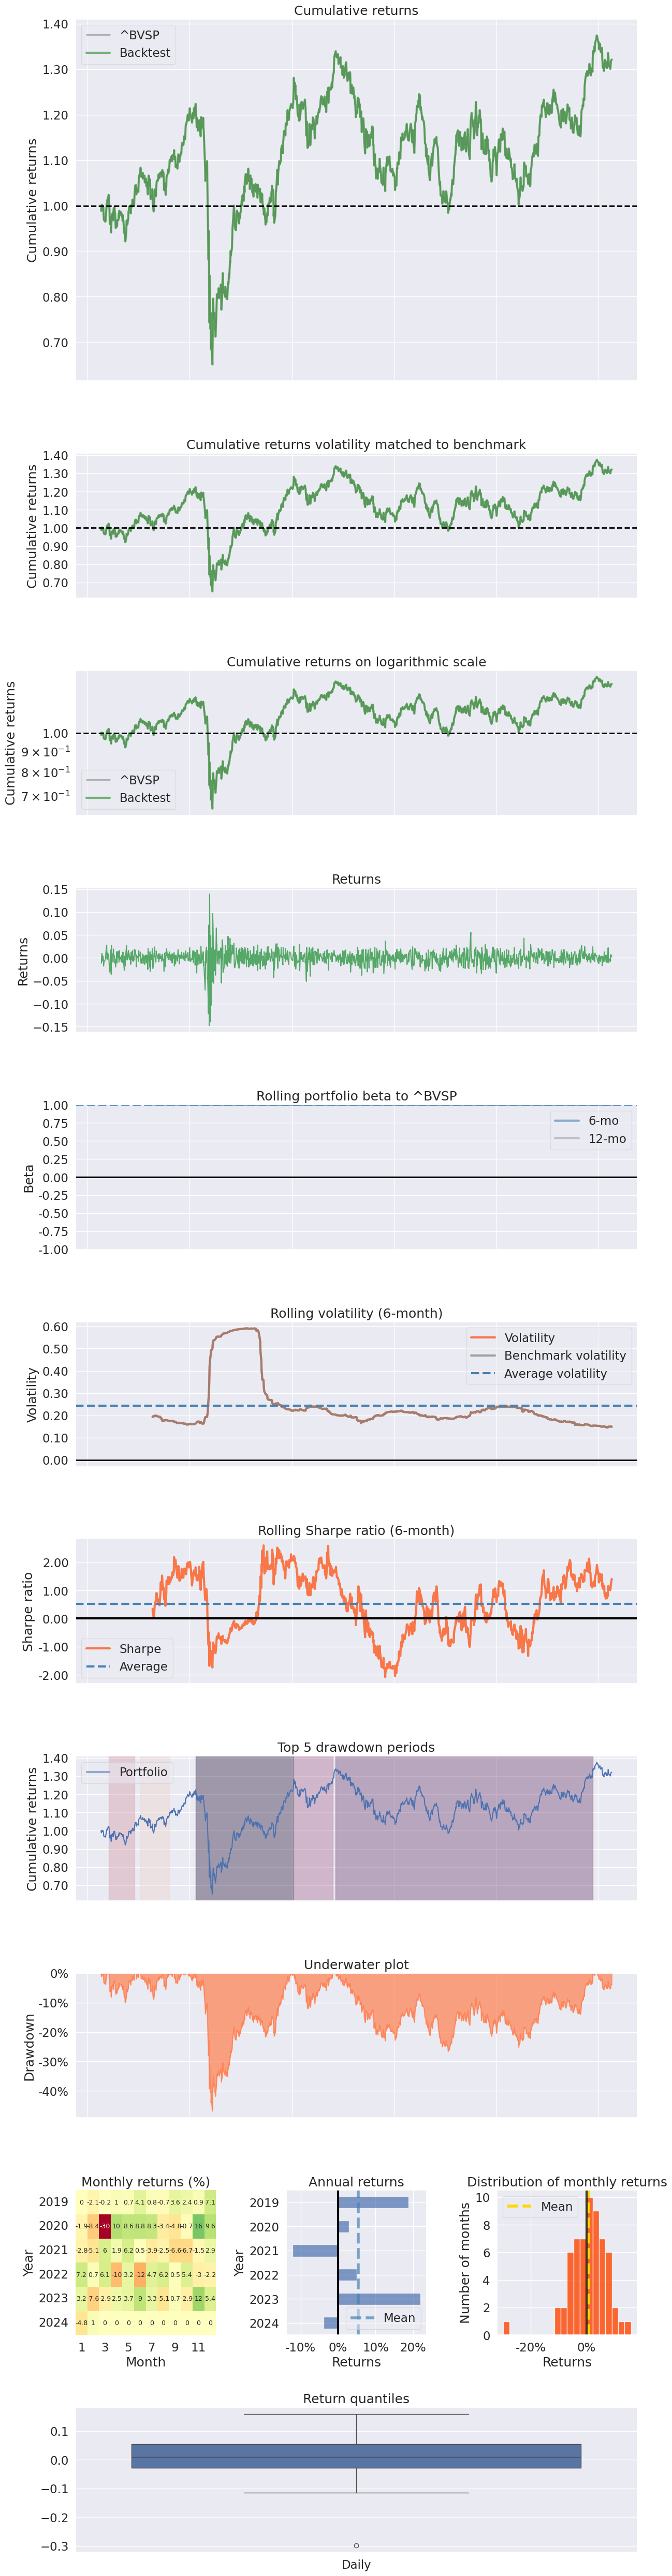

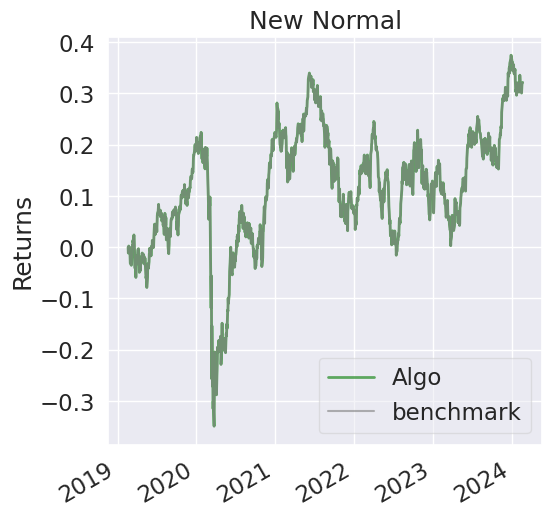

In [ ]:
pf.create_full_tear_sheet(carteira_acumulada['retorno'], benchmark_rets = retorno["^BVSP"]) # cria uma tabela comparativa do retorno das ações com a Ibovespa, plotando diversos gráficos que mostram o desempenho da carteira